# Chapter 2 Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import pymc3 as pm
np.random.seed(123)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


# Question 1
***

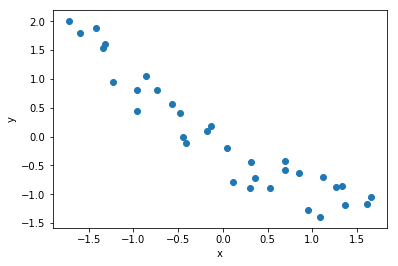

In [3]:
dummy_data = np.loadtxt('../code/data/dummy.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

order = 5
x_1p = np.vstack([x_1**i for i in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / \
    x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

In [12]:
trace_1 = []
for sd in [1, 100, np.array([10, 0.1, 0.1, 0.1, 0.1])]:
    with pm.Model() as model_p:
        α = pm.Normal('α', mu=0, sd=1)
        β = pm.Normal('β', mu=0, sd=sd, shape=order)
        ϵ = pm.HalfNormal('ϵ', 5)

        μ = α + pm.math.dot(β, x_1s)

        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)

        trace_p = pm.sample(2000)
        trace_1.append([sd, trace_p])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:36<00:00, 136.64draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [02:18<00:00, 36.10draws/s]
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:07<00:00, 625.24draws/s]


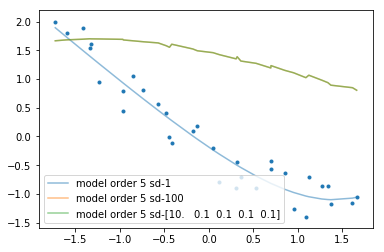

In [23]:
x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

α_p_post = trace_p['α'].mean()
β_p_post = trace_p['β'].mean(axis=0)
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

for i, (sd, trace) in enumerate(trace_1[:3]):
    plt.plot(x_1s[0][idx], y_p_post[idx], f'C{i}', label=f'model order {order} sd-{sd}', alpha=.5)

    α_p_post = trace_p['α'].mean()
    β_p_post = trace_p['β'].mean(axis=0)
    x_new_p = np.vstack([x_new**i for i in range(1, order+1)])
    y_p_post = α_p_post + np.dot(β_p_post, x_new_p) 

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

Question 1:
Why does sd 100 fail to converge in such a weird way? In the third case which coefficient is the one iwth the higher standard deviation on the prior? Why do both priors match the same line?